# Project Name: Credit Fraud Detection Predictive Model

In this project, we will use dataset downloaded from https://www.kaggle.com/mlg-ulb/creditcardfraud to create predictive models to illustrate the accuracy of the models in detecting whether the payment transaction are normal or fraud. Due to privacy of the original dataset, the features are scaled, transformed and the names are not shown. 

## Project Outlines

The project can be broken down to several outlines, and the whole process are refered to as a pipeline of a data science project that takes the dataset until the deployment of the model.

1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

## Basic Library Import

In [48]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
warnings.filterwarnings("ignore")


## Exploratory Data Analysis

The first step in the project is to load the dataset and perform analysis on it. The purpose of the analysis is to gain insight from the dataset that will support the decision making when choosing the predictive models.

In [2]:
# Loading the dataset and finding the table shape

df = pd.read_csv("creditcard.csv")
xshape, yshape = df.shape
print("The dataframe had {} number of rows and {} number of columns".format(xshape,yshape))

The dataframe had 284807 number of rows and 31 number of columns


From the data loadout above, we can see that the dataset contains 284807 samples and had 31 number of features which one of them would be the target variable.

In [3]:
# Shows the first 10 rows of the dataset

df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


As shown above, the dataset does not contain any insightful information such as names of features. As stated before, the dataset were scaled and underwent PCA transformation to protect the privacy of the dataset.The only features that were shown its name were Time and Amount with the Class as the target variable.

In [4]:
# Getting the count of the Class Variable 

print('The dataset had {} number of samples that belongs to Class 0 while {} number of samples belongs \
to the Class 1'.format(df['Class'].value_counts()[0],df['Class'].value_counts()[1]))

The dataset had 284315 number of samples that belongs to Class 0 while 492 number of samples belongs to the Class 1


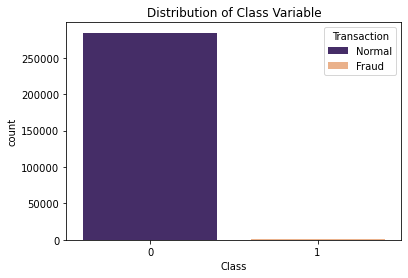

In [5]:
# Visualize the count of the Class Variable 

ax = sns.countplot('Class',data=df, hue = 'Class', palette=['#432371',"#FAAE7B"], dodge=False)
h,l = ax.get_legend_handles_labels()
h,l = ax.get_legend_handles_labels()
labels=["Normal","Fraud"]
ax.legend(h,labels,title="Transaction", loc="upper right") 
plt.title('Distribution of Class Variable')
plt.show()

In [6]:
print("The percentage of Normal Transaction: {:.2f} %".format(df['Class'].value_counts()[0]/len(df)*100))
print("The percentage of Fraud Transaction: {:.2f} %".format(df['Class'].value_counts()[1]/len(df)*100))

The percentage of Normal Transaction: 99.83 %
The percentage of Fraud Transaction: 0.17 %


Based on the graph and the percentage of total normal and fraud transaction in the dataset, we can say that the data was very imbalanced due to the fact majority of the samples identified as **Normal Transaction** (Class 0) with 99.83% whilst **Fraud Transaction** (Class 1) only made up the other 0.17%. If we perform predictive modelling on these dataset, surely the results will be heavily biased to the majority class since the frequency of 0 appearing is high.

In [7]:
# Checking for null values 

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset contains no null value thus no value replacement needed to be done

## Data preprocessing

Since most of the features are pre scaled with the expection of **Time** and **Amount**, we will want to perform features scaling on these two features. This is to ensure that the range of every features are in the same range and to prevent higher weightage given to feature with higher magnitude. 

Some machine learning algorithm like gradient descent-based Logistic Regression, distance-based K Nearest Neighbors are sensitive to the magnitude of features during its learning process which may affect the accuracy if the features are not scaled down beforehand.

In [8]:
# First we perform train test split of the dataset with 20% for testing

X = df.drop('Class', axis=1)
y = df['Class']



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2 )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [9]:
# Performing standardization on the features for both training and test dataset

X_train_scaled = X_train
X_test_scaled = X_test

# Training Set
X_train_scaled['Amount_scaled'] = StandardScaler().fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train_scaled['Time_scaled'] = StandardScaler().fit_transform(X_train['Time'].values.reshape(-1,1))
X_train_scaled = X_train_scaled.drop(['Amount','Time'],axis=1)

# Test Set
X_test_scaled['Amount_scaled'] = StandardScaler().fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test_scaled['Time_scaled'] = StandardScaler().fit_transform(X_test['Time'].values.reshape(-1,1))
X_test_scaled = X_test_scaled.drop(['Amount','Time'],axis=1)

In [10]:
# Viewing the scaled train features

X_train_scaled.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
68806,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,-0.816909,...,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.305116,-0.877510
40018,1.228473,-0.138826,0.473795,-0.166381,-0.453564,-0.190135,-0.355309,0.048598,0.128943,-0.014495,...,-0.172147,-0.574730,0.036834,-0.303782,0.073315,0.810356,-0.069178,0.001890,-0.254237,-1.153085
250360,1.926148,-0.198628,-0.286727,1.596852,-0.488963,-0.311405,-0.303207,0.035513,1.301312,0.007083,...,-0.528432,-1.251300,0.455607,-0.120530,-0.361515,-1.099295,0.052747,-0.032622,-0.329508,1.263832
234820,2.046232,0.196183,-1.704650,0.530027,0.177496,-1.443091,0.255403,-0.365759,0.602945,-0.478188,...,0.201104,0.757245,-0.013600,-0.079318,0.234805,-0.098151,0.000028,-0.031675,-0.338982,1.122044
10001,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,0.889521,...,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,-0.342046,-1.680363
231787,0.123810,1.338609,0.799669,4.241978,1.194155,1.140741,1.320351,-0.268736,-2.054370,1.540301,...,-0.208121,-0.396294,0.035339,-1.084909,-0.629119,0.124763,0.026103,-0.026466,-0.021046,1.096697
215592,2.034162,-0.219934,-1.212055,0.229131,-0.021588,-0.650617,-0.038320,-0.059248,0.520245,0.276677,...,-0.270274,-0.740615,0.311825,-0.434858,-0.347984,0.208867,-0.081039,-0.077228,-0.353335,0.953751
261861,-0.672118,-0.370901,1.713813,-0.132794,-1.664627,1.730900,0.608170,0.213284,1.827998,-1.364938,...,0.222280,1.232461,0.077220,0.753475,-0.685001,-0.316597,0.332133,0.160779,0.884745,1.376462
99817,-1.468507,-0.431667,2.182223,-1.269821,-2.312962,0.800401,-0.389934,-1.274083,2.996543,-1.951440,...,1.586763,0.433452,-0.166711,0.391805,0.042741,-0.552999,0.555174,0.042298,0.650587,-0.579703
147734,-1.123600,0.118142,1.595385,0.410842,0.186938,-0.459664,0.475917,0.009022,0.122368,-0.529117,...,0.304283,0.778930,-0.174272,-0.052045,0.093053,-0.552676,0.013675,0.236525,0.041807,-0.124677


In [11]:
# Viewing the scaled test features

X_test_scaled.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,-0.182854,0.655188
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,-0.330060,1.317402
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0.033966,1.216976
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0.854786,-0.923595
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,-0.318367,-1.577672
134016,0.039885,2.170693,-2.012595,1.653119,0.615994,-1.770922,0.704471,0.057144,-0.013400,-0.626777,...,-0.154384,0.009633,0.218813,0.248031,-0.507112,-0.420895,0.195478,-0.148335,-0.331879,-0.297892
204962,-0.415555,1.625917,1.622797,4.506173,-0.374560,0.901055,-0.405768,0.713219,-1.475385,1.357174,...,0.324710,1.126090,-0.110493,-0.068424,-0.658170,0.512898,0.377955,0.204762,-0.326575,0.859771
60121,1.449410,-0.468795,0.341725,-0.791574,-0.893115,-0.749088,-0.592331,-0.134093,-0.670525,0.625412,...,-0.137542,-0.531360,0.076941,-0.179287,0.287474,-0.446508,0.006978,0.015877,-0.313798,-0.960654
167362,1.971810,-1.200239,-2.830201,-1.670140,1.732721,3.287608,-1.111164,0.818960,-0.336061,0.226586,...,0.157371,0.191050,0.114907,0.622991,-0.123644,-0.192286,0.006081,-0.015564,0.091462,0.503726
112790,-1.367879,-0.238217,1.871754,3.050801,-1.438600,2.489319,1.154520,0.337130,-1.042234,0.456778,...,0.307356,1.050306,0.238809,-0.240770,-0.467593,0.350808,0.258001,0.083143,1.463896,-0.462381


In [12]:
# Lets check the dimension again for all training and test dataset

print("X_train_scaled:",X_train_scaled.shape)
print("X_test_scaled:",X_test_scaled.shape)
print("y_train:",y_train.shape)
print("y_train:",y_test.shape)

X_train_scaled: (227845, 30)
X_test_scaled: (56962, 30)
y_train: (227845,)
y_train: (56962,)


## Data Sampling

Since the dataset was heavily imbalanced to begin with, sampling on the dataset needed to be done through either **undersampling** or **oversampling**. These sampling method will ensure the distribution of the dataset for every class in the class feature to be same (50/50 ratio).

## Undersampling: NearMiss 

Undersampling method is sampling method that reduces the abundant events to match with the rare events to make the distribution balance. In this dataset case, the number of Normal Transaction samples will be reduced to match the number of Fraud Transaction samples. 

For undersampling, we will use NearMiss algorithm which randomly balance the class distribution by eliminating majority class. If the instances of two different classes are close to each other, the instances of majority class will be remove to increase the spaces between the classes.

In [13]:
# Resampled the train set using NearMiss undersampling 

X_train_nm, y_train_nm = NearMiss().fit_resample(X_train_scaled, y_train)

([<matplotlib.axis.XTick at 0x2389a3533a0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

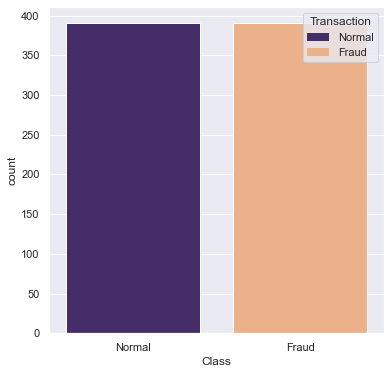

In [14]:
# Visualize the distribution of resampled class

sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(y_train_nm, hue=y_train_nm, palette=['#432371',"#FAAE7B"], dodge=False)
labels=["Normal","Fraud"]
ax.legend(h,labels,title="Transaction", loc="upper right") 
a, b =plt.xticks()
plt.xticks(a,labels)


In [15]:
print("The number undersampled Normal Transaction: {} ".format(y_train_nm.value_counts()[0]))
print("The number of undersampled Fraud Transaction: {} ".format(y_train_nm.value_counts()[1]))

The number undersampled Normal Transaction: 391 
The number of undersampled Fraud Transaction: 391 


Using the NearMiss undersampling, we gain 391 number of samples for both class which are balance and can be train with our predictive models.

## Undersampling: Predictive Modelling

### Logistic Regression

NearMiss Logistic Regression
Classification Report
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.59      0.74     56861
           1       0.00      0.95      0.01       101

    accuracy                           0.59     56962
   macro avg       0.50      0.77      0.37     56962
weighted avg       1.00      0.59      0.74     56962

-----------------------------------------------------------


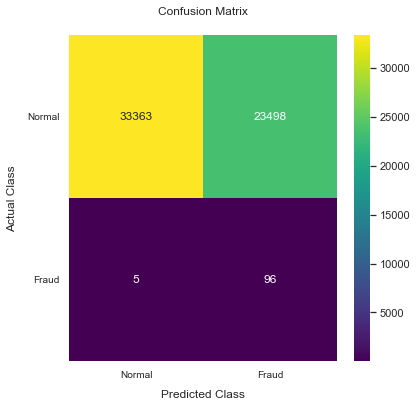

In [16]:
ULR = LogisticRegression().fit(X_train_nm, y_train_nm)
ULR_pred = ULR.predict(X_test_scaled)
ULR_cf = confusion_matrix(y_test, ULR_pred)
ULR_cr = classification_report(y_test, ULR_pred)


sns.heatmap(ULR_cf, annot=True, cmap=plt.cm.viridis,annot_kws={"size": 12},fmt="d")
plt.title("Confusion Matrix", fontsize=12, pad=20)
plt.xticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),fontsize=10)
plt.yticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),rotation=0,fontsize=10)
plt.ylabel("Actual Class", labelpad=10)
plt.xlabel("Predicted Class", labelpad=10)
print('\033[1m' + 'NearMiss Logistic Regression')
print("Classification Report")
print("-----------------------------------------------------------")
print(ULR_cr)
print("-----------------------------------------------------------")

In [17]:
# NearMiss Logistic Regression Metrics

TP,FN,FP,TN = ULR_cf.ravel()

ULR_pre = round(TN/(TN+FN),2)
ULR_rec = round(TN/(TN+FP),2)
ULR_f1 = round(2*(((TN/(TN+FN))*(TN/(TN+FP)))/((TN/(TN+FN))+(TN/(TN+FP)))),2)
ULR_acc = round((TP+TN)/(TP+TN+FP+FN),2)

In [18]:
# Generating False Positive Rate, True Positve Rate and Threshold

ULR_fpr, ULR_tpr, ULR_threshold = roc_curve(y_test, ULR_pred)

NearMiss Decision Tree
Classification Report
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.26      0.42     56861
           1       0.00      0.94      0.00       101

    accuracy                           0.26     56962
   macro avg       0.50      0.60      0.21     56962
weighted avg       1.00      0.26      0.42     56962

-----------------------------------------------------------


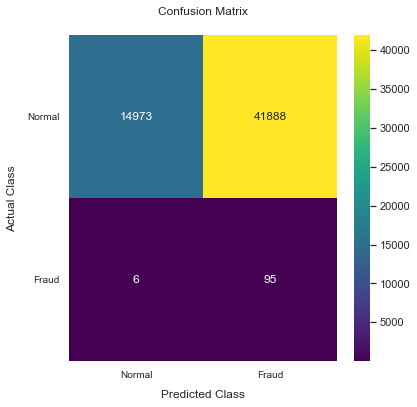

In [19]:
UDT = DecisionTreeClassifier().fit(X_train_nm, y_train_nm)
UDT_pred = UDT.predict(X_test_scaled)
UDT_cf = confusion_matrix(y_test, UDT_pred)
UDT_cr = classification_report(y_test, UDT_pred)


sns.heatmap(UDT_cf, annot=True, cmap=plt.cm.viridis,annot_kws={"size": 12},fmt="d")
plt.title("Confusion Matrix", fontsize=12, pad=20)
plt.xticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),fontsize=10)
plt.yticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),rotation=0,fontsize=10)
plt.ylabel("Actual Class", labelpad=10)
plt.xlabel("Predicted Class", labelpad=10)
print('\033[1m' + 'NearMiss Decision Tree')
print("Classification Report")
print("-----------------------------------------------------------")
print(UDT_cr)
print("-----------------------------------------------------------")

In [20]:
# NearMiss Decision Tree Metrics

TP,FN,FP,TN = UDT_cf.ravel()

UDT_pre = round(TN/(TN+FN),2)
UDT_rec = round(TN/(TN+FP),2)
UDT_f1 = round(2*(((TN/(TN+FN))*(TN/(TN+FP)))/((TN/(TN+FN))+(TN/(TN+FP)))),2)
UDT_acc = round((TP+TN)/(TP+TN+FP+FN),2)

In [21]:
# Generating False Positive Rate, True Positve Rate and Threshold

UDT_fpr, UDT_tpr, UDT_threshold = roc_curve(y_test, UDT_pred)

NearMiss K-Nearest Neighbors
Classification Report
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     56861
           1       0.01      0.96      0.01       101

    accuracy                           0.69     56962
   macro avg       0.50      0.83      0.41     56962
weighted avg       1.00      0.69      0.82     56962

-----------------------------------------------------------


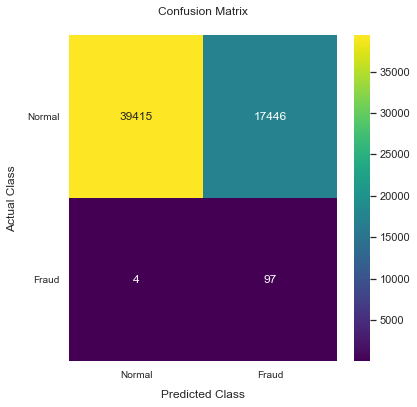

In [22]:
UKNN = KNeighborsClassifier().fit(X_train_nm, y_train_nm)
UKNN_pred = UKNN.predict(X_test_scaled)
UKNN_cf = confusion_matrix(y_test, UKNN_pred)
UKNN_cr = classification_report(y_test, UKNN_pred)


sns.heatmap(UKNN_cf, annot=True, cmap=plt.cm.viridis,annot_kws={"size": 12},fmt="d")
plt.title("Confusion Matrix", fontsize=12, pad=20)
plt.xticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),fontsize=10)
plt.yticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),rotation=0,fontsize=10)
plt.ylabel("Actual Class", labelpad=10)
plt.xlabel("Predicted Class", labelpad=10)
print('\033[1m' + 'NearMiss K-Nearest Neighbors')
print("Classification Report")
print("-----------------------------------------------------------")
print(UKNN_cr)
print("-----------------------------------------------------------")

In [23]:
# NearMiss K-Nearest Neighbors Metrics

TP,FN,FP,TN = UKNN_cf.ravel()

UKNN_pre = round(TN/(TN+FN),2)
UKNN_rec = round(TN/(TN+FP),2)
UKNN_f1 = round(2*(((TN/(TN+FN))*(TN/(TN+FP)))/((TN/(TN+FN))+(TN/(TN+FP)))),2)
UKNN_acc = round((TP+TN)/(TP+TN+FP+FN),2)

In [24]:
# Generating False Positive Rate, True Positve Rate and Threshold

UKNN_fpr, UKNN_tpr, UKNN_threshold = roc_curve(y_test, UKNN_pred)

NearMiss Support Vector Machine
Classification Report
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56861
           1       0.02      0.88      0.03       101

    accuracy                           0.90     56962
   macro avg       0.51      0.89      0.49     56962
weighted avg       1.00      0.90      0.95     56962

-----------------------------------------------------------


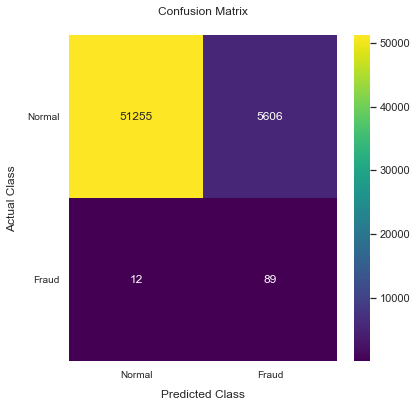

In [25]:
USVM = SVC().fit(X_train_nm, y_train_nm)
USVM_pred = USVM.predict(X_test_scaled)
USVM_cf = confusion_matrix(y_test, USVM_pred)
USVM_cr = classification_report(y_test, USVM_pred)


sns.heatmap(USVM_cf, annot=True, cmap=plt.cm.viridis,annot_kws={"size": 12},fmt="d")
plt.title("Confusion Matrix", fontsize=12, pad=20)
plt.xticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),fontsize=10)
plt.yticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),rotation=0,fontsize=10)
plt.ylabel("Actual Class", labelpad=10)
plt.xlabel("Predicted Class", labelpad=10)
print('\033[1m' + 'NearMiss Support Vector Machine')
print("Classification Report")
print("-----------------------------------------------------------")
print(USVM_cr)
print("-----------------------------------------------------------")

In [26]:
# NearMiss Support Vector Machine Metrics

TP,FN,FP,TN = USVM_cf.ravel()

USVM_pre = round(TN/(TN+FN),2)
USVM_rec = round(TN/(TN+FP),2)
USVM_f1 = round(2*(((TN/(TN+FN))*(TN/(TN+FP)))/((TN/(TN+FN))+(TN/(TN+FP)))),2)
USVM_acc = round((TP+TN)/(TP+TN+FP+FN),2)

In [27]:
# Generating False Positive Rate, True Positve Rate and Threshold

USVM_fpr, USVM_tpr, USVM_threshold = roc_curve(y_test, USVM_pred)

## Oversampling: SMOTE 

Oversampling method is sampling method that increase the rare events to match with the abundant events to make the distribution balance. In this dataset case, the number of Fraud Transaction samples will be increases to match the number of Normal Transaction samples. 

SMOTE or Synthetic Minority Oversampling Technique will duplicate the minority class so that its match with the amount of the majority class. SMOTE works by selecting examples that are close with each other in the feature space, drawing a line in between it and drawing new sample at a point along the line.

In [28]:
# Resampled the train set using SMOTE

X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_train_scaled, y_train)

([<matplotlib.axis.XTick at 0x2389a8af730>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

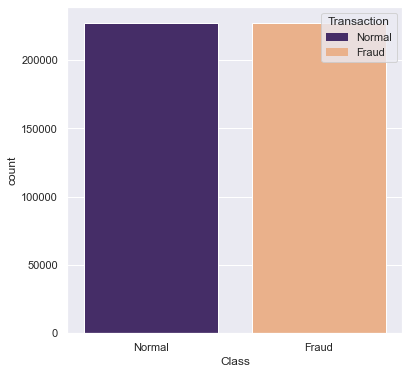

In [29]:
# Visualize the distribution of resampled class

sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(y_train_SMOTE, hue=y_train_SMOTE, palette=['#432371',"#FAAE7B"], dodge=False)
labels=["Normal","Fraud"]
ax.legend(h,labels,title="Transaction", loc="upper right") 
a, b =plt.xticks()
plt.xticks(a,labels)


In [30]:
print("The number oversampled Normal Transaction: {} ".format(y_train_SMOTE.value_counts()[0]))
print("The number of oversampled Fraud Transaction: {} ".format(y_train_SMOTE.value_counts()[1]))

The number oversampled Normal Transaction: 227454 
The number of oversampled Fraud Transaction: 227454 


Using the SMOTE oversampling, we get 227454 samples for both class which the minority class 1 were increased through oversampling to match the majority class 0.

## Oversampling: Predictive Modelling

SMOTE Logistic Regression
Classification Report
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962

-----------------------------------------------------------


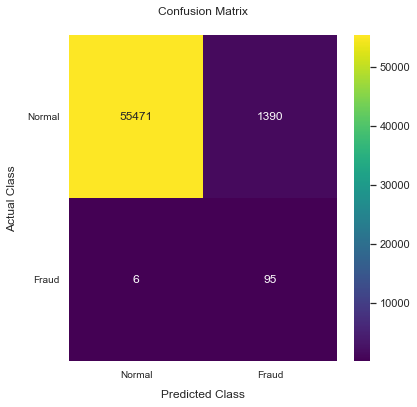

In [31]:
OLR = LogisticRegression().fit(X_train_SMOTE, y_train_SMOTE)
OLR_pred = OLR.predict(X_test_scaled)
OLR_cf = confusion_matrix(y_test, OLR_pred)
OLR_cr = classification_report(y_test, OLR_pred)


sns.heatmap(OLR_cf, annot=True, cmap=plt.cm.viridis,annot_kws={"size": 12},fmt="d")
plt.title("Confusion Matrix", fontsize=12, pad=20)
plt.xticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),fontsize=10)
plt.yticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),rotation=0,fontsize=10)
plt.ylabel("Actual Class", labelpad=10)
plt.xlabel("Predicted Class", labelpad=10)
print('\033[1m' + 'SMOTE Logistic Regression')
print("Classification Report")
print("-----------------------------------------------------------")
print(OLR_cr)
print("-----------------------------------------------------------")

In [32]:
# SMOTE Logistic Regression Metrics

TP,FN,FP,TN = OLR_cf.ravel()

OLR_pre = round(TN/(TN+FN),2)
OLR_rec = round(TN/(TN+FP),2)
OLR_f1 = round(2*(((TN/(TN+FN))*(TN/(TN+FP)))/((TN/(TN+FN))+(TN/(TN+FP)))),2)
OLR_acc = round((TP+TN)/(TP+TN+FP+FN),2)
       

In [33]:
# Generating False Positive Rate, True Positve Rate and Threshold

OLR_fpr, OLR_tpr, OLR_threshold = roc_curve(y_test, OLR_pred)

SMOTE Decision Tree
Classification Report
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.29      0.79      0.43       101

    accuracy                           1.00     56962
   macro avg       0.65      0.89      0.71     56962
weighted avg       1.00      1.00      1.00     56962

-----------------------------------------------------------


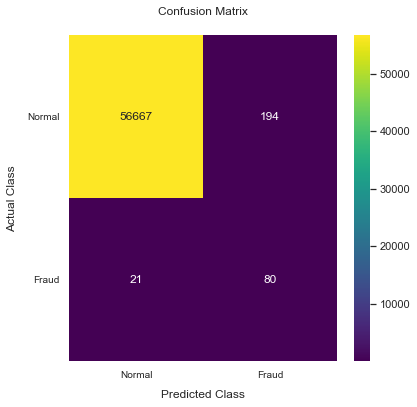

In [34]:
ODT = DecisionTreeClassifier().fit(X_train_SMOTE, y_train_SMOTE)
ODT_pred = ODT.predict(X_test_scaled)
ODT_cf = confusion_matrix(y_test, ODT_pred)
ODT_cr = classification_report(y_test, ODT_pred)


sns.heatmap(ODT_cf, annot=True, cmap=plt.cm.viridis,annot_kws={"size": 12},fmt="d")
plt.title("Confusion Matrix", fontsize=12, pad=20)
plt.xticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),fontsize=10)
plt.yticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),rotation=0,fontsize=10)
plt.ylabel("Actual Class", labelpad=10)
plt.xlabel("Predicted Class", labelpad=10)
print('\033[1m' + 'SMOTE Decision Tree')
print("Classification Report")
print("-----------------------------------------------------------")
print(ODT_cr)
print("-----------------------------------------------------------")

In [35]:
# SMOTE Decision Tree Metrics

TP,FN,FP,TN = ODT_cf.ravel()

ODT_pre = round(TN/(TN+FN),2)
ODT_rec = round(TN/(TN+FP),2)
ODT_f1 = round(2*(((TN/(TN+FN))*(TN/(TN+FP)))/((TN/(TN+FN))+(TN/(TN+FP)))),2)
ODT_acc = round((TP+TN)/(TP+TN+FP+FN),2)

In [36]:
# Generating False Positive Rate, True Positve Rate and Threshold

ODT_fpr, ODT_tpr, ODT_threshold = roc_curve(y_test, ODT_pred)

SMOTE K-Nearest Neighbors
Classification Report
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.50      0.88      0.64       101

    accuracy                           1.00     56962
   macro avg       0.75      0.94      0.82     56962
weighted avg       1.00      1.00      1.00     56962

-----------------------------------------------------------


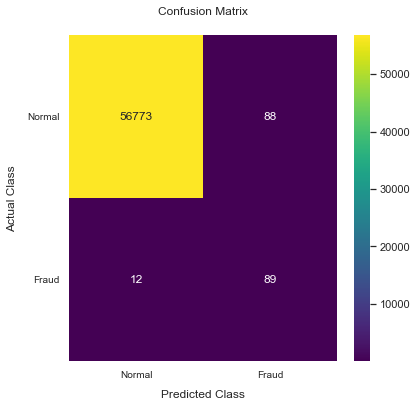

In [37]:
OKNN = KNeighborsClassifier().fit(X_train_SMOTE, y_train_SMOTE)
OKNN_pred = OKNN.predict(X_test_scaled)
OKNN_cf = confusion_matrix(y_test, OKNN_pred)
OKNN_cr = classification_report(y_test, OKNN_pred)


sns.heatmap(OKNN_cf, annot=True, cmap=plt.cm.viridis,annot_kws={"size": 12},fmt="d")
plt.title("Confusion Matrix", fontsize=12, pad=20)
plt.xticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),fontsize=10)
plt.yticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),rotation=0,fontsize=10)
plt.ylabel("Actual Class", labelpad=10)
plt.xlabel("Predicted Class", labelpad=10)
print('\033[1m' + 'SMOTE K-Nearest Neighbors')
print("Classification Report")
print("-----------------------------------------------------------")
print(OKNN_cr)
print("-----------------------------------------------------------")

In [38]:
# SMOTE K-Nearest Neighbors Metrics

TP,FN,FP,TN = OKNN_cf.ravel()

OKNN_pre = round(TN/(TN+FN),2)
OKNN_rec = round(TN/(TN+FP),2)
OKNN_f1 = round(2*(((TN/(TN+FN))*(TN/(TN+FP)))/((TN/(TN+FN))+(TN/(TN+FP)))),2)
OKNN_acc = round((TP+TN)/(TP+TN+FP+FN),2)

In [39]:
# Generating False Positive Rate, True Positve Rate and Threshold

OKNN_fpr, OKNN_tpr, OKNN_threshold = roc_curve(y_test, OKNN_pred)

SMOTE Support Vector Machine
Classification Report
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.10      0.92      0.18       101

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962

-----------------------------------------------------------


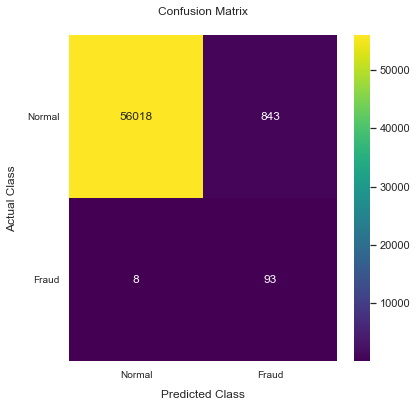

In [41]:
OSVM = SVC().fit(X_train_SMOTE, y_train_SMOTE)
OSVM_pred = OSVM.predict(X_test_scaled)
OSVM_cf = confusion_matrix(y_test, OSVM_pred)
OSVM_cr = classification_report(y_test, OSVM_pred)


sns.heatmap(OSVM_cf, annot=True, cmap=plt.cm.viridis,annot_kws={"size": 12},fmt="d")
plt.title("Confusion Matrix", fontsize=12, pad=20)
plt.xticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),fontsize=10)
plt.yticks(ticks = (0.5, 1.5), labels = ("Normal","Fraud"),rotation=0,fontsize=10)
plt.ylabel("Actual Class", labelpad=10)
plt.xlabel("Predicted Class", labelpad=10)
print('\033[1m' + 'SMOTE Support Vector Machine')
print("Classification Report")
print("-----------------------------------------------------------")
print(OSVM_cr)
print("-----------------------------------------------------------")

In [42]:
# SMOTE Support Vector Machine Metrics

TP,FN,FP,TN = OSVM_cf.ravel()

OSVM_pre = round(TN/(TN+FN),2)
OSVM_rec = round(TN/(TN+FP),2)
OSVM_f1 = round(2*(((TN/(TN+FN))*(TN/(TN+FP)))/((TN/(TN+FN))+(TN/(TN+FP)))),2)
OSVM_acc = round((TP+TN)/(TP+TN+FP+FN),2)

In [62]:
# Generating False Positive Rate, True Positve Rate and Threshold

OSVM_fpr, OSVM_tpr, OSVM_threshold = roc_curve(y_test, OSVM_pred)

# Model Performance Analysis

In [44]:
# Near Miss Undersampling Results

undersampled_data = {'Model':["Logistic Regression", "Decision Tree", "K-Nearest Neighbors", "Support Vector Machine"],
    "Precision":[ULR_pre,UDT_pre,UKNN_pre,USVM_pre],
    'Recall':[ULR_rec,UDT_rec,UKNN_rec,USVM_rec],
    'F1-Score':[ULR_f1,UDT_f1,UKNN_f1,USVM_f1],
    'Accuracy':[ULR_acc,UDT_acc,UKNN_acc,USVM_acc]}

In [45]:
undersampled_model = pd.DataFrame(undersampled_data)
undersampled_model

,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.00,0.95,0.01,0.59
1,Decision Tree,0.00,0.94,0.00,0.26
2,K-Nearest Neighbors,0.01,0.96,0.01,0.69
3,Support Vector Machine,0.02,0.88,0.03,0.90


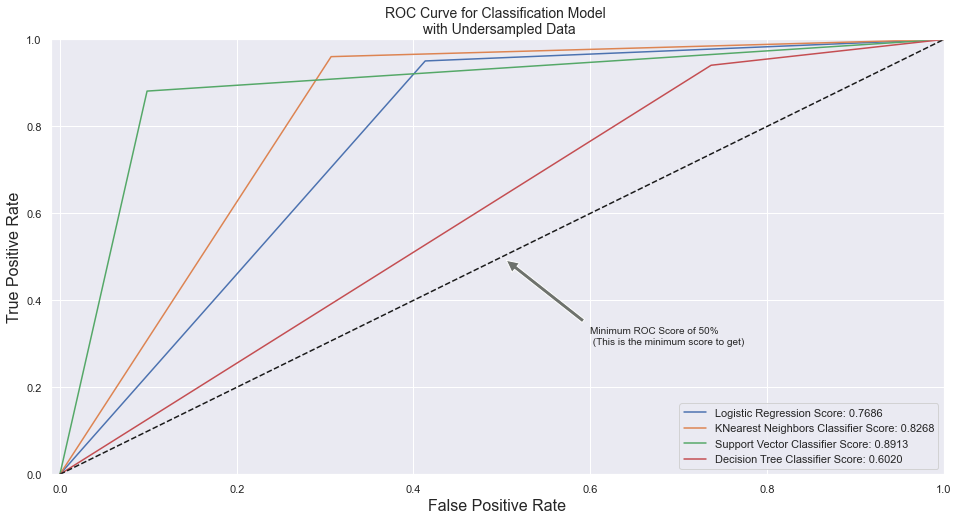

In [64]:
# Generating ROC Curve for Undersampled Data

plt.figure(figsize=(16,8))
plt.title('ROC Curve for Classification Model \n with Undersampled Data', fontsize=14)
plt.plot(ULR_fpr, ULR_tpr, label ='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_test, ULR_pred)))
plt.plot(UKNN_fpr, UKNN_tpr, label='KNearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, UKNN_pred)))
plt.plot(USVM_fpr, USVM_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, USVM_pred)))
plt.plot(UDT_fpr, UDT_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, UDT_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
plt.legend()

Based on ROC curve above for all the classifier using undersampled dataset, the Support Vector Machine had the highest TPR with the lowest FPR values. This is translated into the AUC score of the SVC with score of 0.891

In [66]:
# SMOTE Oversampling Results

oversampled_data = {'Model':["Logistic Regression", "Decision Tree", "K-Nearest Neighbors", "Support Vector Machine"],
    "Precision":[OLR_pre,ODT_pre,OKNN_pre,OSVM_pre],
    'Recall':[OLR_rec,ODT_rec,OKNN_rec,OSVM_rec],
    'F1-Score':[OLR_f1,ODT_f1,OKNN_f1,OSVM_f1],
    'Accuracy':[OLR_acc,ODT_acc,OKNN_acc,OSVM_acc]}

In [67]:
oversampled_model = pd.DataFrame(oversampled_data)
oversampled_model

,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.06,0.94,0.12,0.98
1,Decision Tree,0.29,0.79,0.43,1.00
2,K-Nearest Neighbors,0.50,0.88,0.64,1.00
3,Support Vector Machine,0.10,0.92,0.18,0.99


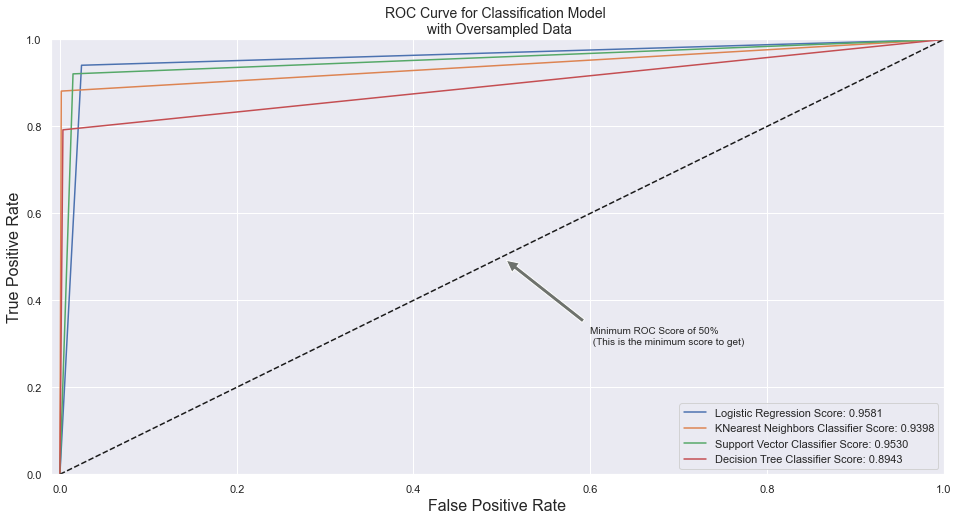

In [56]:
# Generating ROC Curve for Oversampled Data

plt.figure(figsize=(16,8))
plt.title('ROC Curve for Classification Model \n with Oversampled Data', fontsize=14)
plt.plot(OLR_fpr, OLR_tpr, label ='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_test, OLR_pred)))
plt.plot(OKNN_fpr, OKNN_tpr, label='KNearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, OKNN_pred)))
plt.plot(OSVM_fpr, OSVM_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, OSVM_pred)))
plt.plot(ODT_fpr, ODT_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ODT_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Negative Rate', fontsize=16)
plt.ylabel('True Negative Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
plt.legend()

Based on ROC curve above for all the classifier using oversampled dataset, all of the classifier gave out good score with relatively high TPR and low FPR. Logistic Regression provided the highest AUC score with score of 0.9581 from all the model in the case of oversampled data.